<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# WSR - Get daily Covid19 active cases trend JHU
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/WSR/WSR_Get_daily_Covid19_active_cases_worldmap_JHU.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #wsr #covid #active-cases #analytics #plotly #automation #naas

**Author:** [Florent Ravenel](https://www.linkedin.com/in/ACoAABCNSioBW3YZHc2lBHVG0E_TXYWitQkmwog/)

## Input

In [1]:
%run common.ipynb

👌 Notebook common.ipynb loaded


### Import libraries

In [2]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import naas
from naas_drivers import prediction

### Variables

In [3]:
# Input URLs of the raw csv dataset
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]

# Outputs
uid = "WSR_00002"
name_output = "Covid19_Activecases_trend"
title = "COVID 19 - Active cases (in milions)"

### Schedule your notebook

In [ ]:
# naas.scheduler.add(cron="0 0 * * *")

## Model

### Get data from JHU

In [4]:
def get_data_url(urls):
    df = pd.DataFrame()
    for url in urls:
        tmp_df = pd.read_csv(url)
        tmp_df["Indicator"] = url.split("/time_series_covid19_")[-1].split("_global.csv")[0].capitalize()
        df = pd.concat([df, tmp_df])
    return df

df_init = get_data_url(urls)
df_init

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22,3/14/22,3/15/22,Indicator
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,175000,175353,175525,175893,175974,176039,176201,176409,176571,Confirmed
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,272250,272337,272412,272479,272552,272621,272663,272689,272711,Confirmed
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265297,265323,265346,265366,265391,265410,265432,265457,265478,Confirmed
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,38620,38710,38794,38794,38794,38794,38794,38794,38794,Confirmed
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,98806,98829,98855,98855,98855,98909,98927,98931,98956,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Recovered
265,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Recovered
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Recovered
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Recovered


### Get all data from JHU

In [5]:
def get_all_data(df_init):
    df = df_init.copy()
    # Cleaning
    df = df.drop("Province/State", axis=1)
    
    # Melt data
    df = pd.melt(df,
                 id_vars=["Country/Region", "Lat", "Long", "Indicator"],
                 var_name="Date",
                 value_name="Value").fillna(0)
    df["Date"] = pd.to_datetime(df["Date"])
    
    # Calc active cases
    df_active = df.copy()
    df_active.loc[df_active["Indicator"].isin(["Deaths", "Recovered"]), "Value"] = df_active["Value"] * (-1)
    df_active["Indicator"] = "Active cases"
    
    # Concat data
    df = pd.concat([df, df_active])
    
    # Group by country/region
    to_group = ["Country/Region", "Lat", "Long", "Indicator", "Date"]
    df = df.groupby(to_group, as_index=False).agg({"Value": "sum"})
    
    # Cleaning
    df = df.rename(columns={"Country/Region": "COUNTRY"})
    df.columns = df.columns.str.upper()
    return df.reset_index(drop=True)

df_clean = get_all_data(df_init)
df_clean

,COUNTRY,LAT,LONG,INDICATOR,DATE,VALUE
0,Afghanistan,33.939110,67.709953,Active cases,2020-01-22,0
1,Afghanistan,33.939110,67.709953,Active cases,2020-01-23,0
2,Afghanistan,33.939110,67.709953,Active cases,2020-01-24,0
3,Afghanistan,33.939110,67.709953,Active cases,2020-01-25,0
4,Afghanistan,33.939110,67.709953,Active cases,2020-01-26,0
...,...,...,...,...,...,...
878075,Zimbabwe,-19.015438,29.154857,Recovered,2022-03-11,0
878076,Zimbabwe,-19.015438,29.154857,Recovered,2022-03-12,0
878077,Zimbabwe,-19.015438,29.154857,Recovered,2022-03-13,0
878078,Zimbabwe,-19.015438,29.154857,Recovered,2022-03-14,0


### Get trend

In [23]:
def get_trend(df_init):
    df = df_init.copy()
    # Filter
    df = df[(df["INDICATOR"] == "Active cases")]
    
    # Groupby date
    df = df.groupby(["DATE"], as_index=False).agg({"VALUE": 'sum'})
    
    # Calc variation
    for idx, row in df.iterrows():
        if idx == 0:
            value_n1 = 0
        else:
            value_n1 = df.loc[df.index[idx-1], "VALUE"]
        df.loc[df.index[idx], "VALUE_COMP"] = value_n1
    df["VARV"] = df["VALUE"] - df["VALUE_COMP"]
    df["VARP"] = df["VARV"] / abs(df["VALUE_COMP"])
    
    # Calc variation
    for idx, row in df.iterrows():
        if idx == 0:
            value_n1 = 0
        else:
            value_n1 = df.loc[df.index[idx-1], "VARP"]
        df.loc[df.index[idx], "VARP_COMP"] = value_n1
    df["VARP_VAR"] = df["VARP"] - df["VARP_COMP"]
    
    # Prep data
    df["VALUE_D"] = df["VALUE"].map("{:,.0f}".format).str.replace(",", " ")
    df["VARV_D"] = df["VARV"].map("{:,.0f}".format).str.replace(",", " ")
    df.loc[df["VARV"] > 0, "VARV_D"] = "+" + df["VARV_D"]
    df["VARP_D"] = df["VARP"].map("{:,.2%}".format).str.replace(",", " ")
    df.loc[df["VARP"] > 0, "VARP_D"] = "+" + df["VARP_D"]
    
    df["TEXT"] = (df['VALUE_D'] + " active cases as of " + df['DATE'].dt.strftime("%Y-%m-%d") + "<br>"
                  " (" + df['VARP_D'] + " vs yesterday)")
    return df

df_trend = get_trend(df_clean)
df_trend.tail(30)

,DATE,VALUE,VALUE_COMP,VARV,VARP,VARP_COMP,VARP_VAR,VALUE_D,VARV_D,VARP_D,TEXT
754,2022-02-14,407897048,406110384.0,1786664.0,0.004399,0.003583,0.000817,407 897 048,+1 786 664,+0.44%,407 897 048 active cases as of 2022-02-14<br> ...
755,2022-02-15,409670076,407897048.0,1773028.0,0.004347,0.004399,-0.000053,409 670 076,+1 773 028,+0.43%,409 670 076 active cases as of 2022-02-15<br> ...
756,2022-02-16,412076276,409670076.0,2406200.0,0.005874,0.004347,0.001527,412 076 276,+2 406 200,+0.59%,412 076 276 active cases as of 2022-02-16<br> ...
757,2022-02-17,414100501,412076276.0,2024225.0,0.004912,0.005874,-0.000961,414 100 501,+2 024 225,+0.49%,414 100 501 active cases as of 2022-02-17<br> ...
758,2022-02-18,416031939,414100501.0,1931438.0,0.004664,0.004912,-0.000248,416 031 939,+1 931 438,+0.47%,416 031 939 active cases as of 2022-02-18<br> ...
759,2022-02-19,417576421,416031939.0,1544482.0,0.003712,0.004664,-0.000952,417 576 421,+1 544 482,+0.37%,417 576 421 active cases as of 2022-02-19<br> ...
760,2022-02-20,418840138,417576421.0,1263717.0,0.003026,0.003712,-0.000686,418 840 138,+1 263 717,+0.30%,418 840 138 active cases as of 2022-02-20<br> ...
761,2022-02-21,420292906,418840138.0,1452768.0,0.003469,0.003026,0.000442,420 292 906,+1 452 768,+0.35%,420 292 906 active cases as of 2022-02-21<br> ...
762,2022-02-22,422090223,420292906.0,1797317.0,0.004276,0.003469,0.000808,422 090 223,+1 797 317,+0.43%,422 090 223 active cases as of 2022-02-22<br> ...
763,2022-02-23,424021905,422090223.0,1931682.0,0.004576,0.004276,0.000300,424 021 905,+1 931 682,+0.46%,424 021 905 active cases as of 2022-02-23<br> ...


### Create linechart

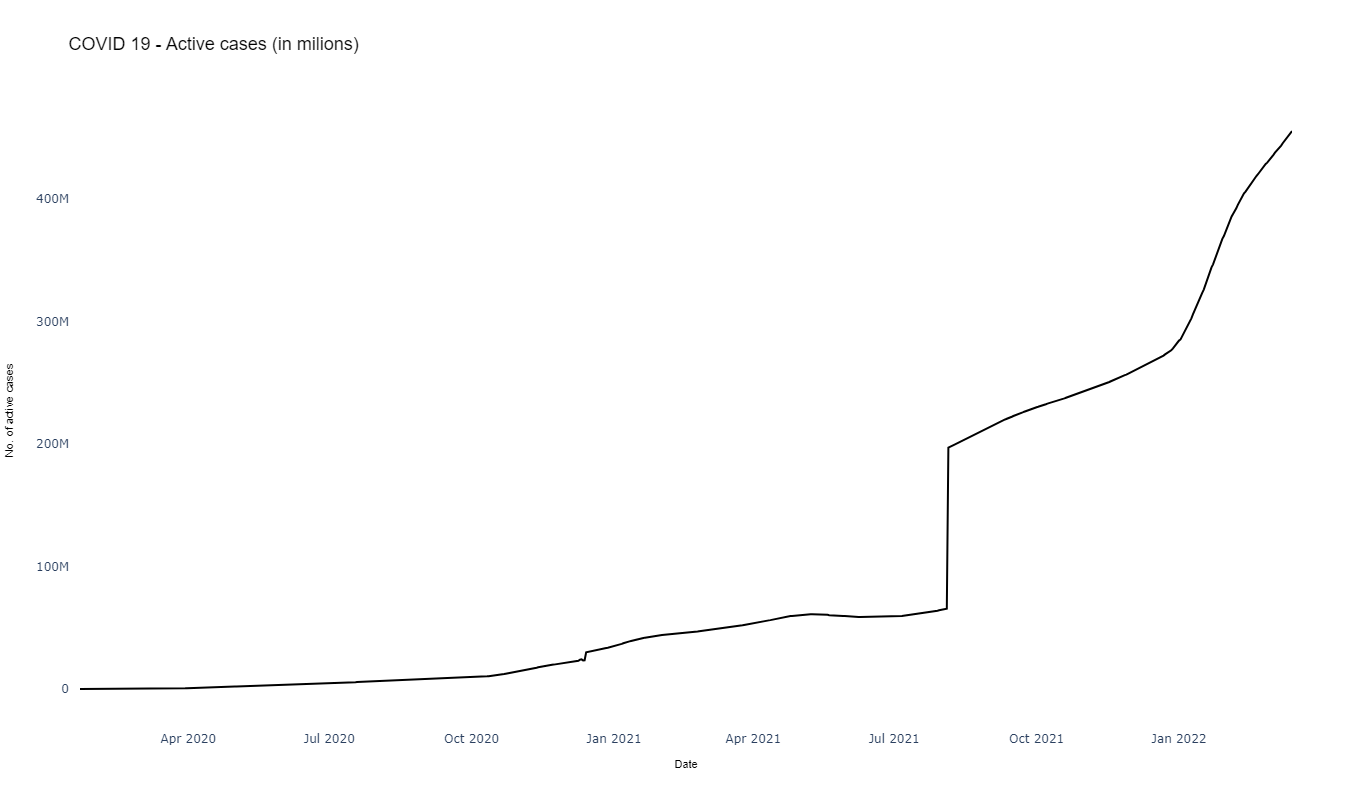

In [24]:
def create_linechart(df, label, value, text):
    # Init
    fig = go.Figure()
    
    # Create fig
    fig.add_trace(
        go.Scatter(
            x=df[label],
            y=df[value],
            text=df[text],
            hoverinfo="text",
            mode="lines",
            line=dict(color="black"),
        )
    )
    fig.update_traces(marker_color='black')
    fig.update_layout(
        title=title,
        title_font=dict(family="Arial", size=18, color="black"),
        plot_bgcolor="#ffffff",
        width=1200,
        height=800,
        paper_bgcolor="white",
        xaxis_title="Date",
        xaxis_title_font=dict(family="Arial", size=11, color="black"),
        yaxis_title='No. of active cases',
        yaxis_title_font=dict(family="Arial", size=11, color="black"),
        margin_pad=10,
    )
    fig.show()
    return fig

fig = create_linechart(df_trend, "DATE", "VALUE", "TEXT")

### Get sentiment

In [30]:
def get_sentiment(df):
    sentiment = None
    value = abs(df.loc[df.index[-1], "VARP_VAR"] * 100)
    if value > 0:
        return -1
    elif value < 1:
        return 1
    return sentiment

sentiment = get_sentiment(df_trend)
sentiment

-1

## Output

### Save and share csv with naas

In [31]:
csv_link = save_output("dataframe-csv", name_output, df_trend)
csv_link

💾 Dataframe successfully saved in csv ../output/Covid19_Activecases_trend.csv
👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


'https://public.naas.ai/d3NyLTQwbmFhcy0yRWFp/asset/7c642dbc87185601af68a1b94f0433563f9ff37809d06cdeaaaf731b4bc1'

### Save and share image with naas

In [32]:
image_link = save_output("chart-png", name_output, fig)
image_link

💾 Graph successfully saved in image ../output/Covid19_Activecases_trend.png
👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


'https://public.naas.ai/d3NyLTQwbmFhcy0yRWFp/asset/745b5485664d48802fd6001d97361159392c29991d6df5d6b1828e19d59b.png'

### Save and share html with naas

In [34]:
html_link = save_output("chart-html", name_output, fig)
html_link

💾 Graph successfully saved in html ../output/Covid19_Activecases_trend.html
👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


'https://public.naas.ai/d3NyLTQwbmFhcy0yRWFp/asset/92dc438c6344984cba41c2786d854e620fc817ac38cfa6ade7381d0aceb5'

### Update Notion DB

In [35]:
update_report_status(uid, name_output=name_output, csv_link=csv_link, image_link=image_link, html_link=html_link, sentiment=sentiment)

✅ Page 'WSR_00002' updated in Notion. 🟠 WIP
